In [1]:
import xml.etree.ElementTree as ET
import pandas as pd



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib import cm

import math 
import statistics

from ROOT import TCanvas, TH1F, TGraph, gROOT
from array import array


import pprint
import re


Welcome to JupyROOT 6.30/06


# Input padplane mapping

In [2]:
new_maps = [ 
    'NewMaps/AutoPad-R1-RevA.sch',
    'NewMaps/AutoPad-R2-RevA-Pads.sch',
    'NewMaps/AutoPad-R3-RevA.sch',
]
old_maps = [ 
    'AutoPad-R1-RevA.sch',
    'AutoPad-R2-RevA-Pads.sch',
    'AutoPad-R3-RevA.sch',
]

In [3]:
colors = [
    "red",        # Red
    "blue",       # Blue
    "purple",     # Purple
    "darkgreen",  # Dark Green
    "darkred",    # Dark Red
    "gray",       # Gray
    "indigo"      # Indigo
]

In [4]:
# Parameters
num_circles = 4  # Number of concentric circles
num_sectors = 12  # Number of radial divisions (sectors)
inner_radius = 1  # Radius of the inner circle (to exclude the center)
rotation_offset = np.pi / num_sectors  # Half the angle of one sector
module_radius = [31.105,40.249,41.153,57.475,58.367,75.911]
colors = ['tomato','c','green']

In [6]:
new_df_centroids, old_df_centroids = [], []
for imap in new_maps:
    new_df_centroids.append(pd.read_csv(f"{imap}.ChannelMapping.csv"))
for imap in old_maps:
    old_df_centroids.append(pd.read_csv(f"{imap}.ChannelMapping.csv"))

In [6]:
def draw_wagonwheel(view):

    # Create the figure and axis
    fig = plt.figure(figsize=(60, 30))  # Adjust figure size (10x5 is a more typical size)
    # Add polar subplots
    ax1 = fig.add_subplot(121, polar=True)  # 1 row, 2 columns, 1st subplot
    ax2 = fig.add_subplot(122, polar=True) 
    #(ax1,ax2) = plt.subplot(111, polar=True)

    # Draw concentric circles
    circle_radii = np.linspace(inner_radius, inner_radius + num_circles - 1, num_circles)
    for radius in module_radius:
        ax1.plot(np.linspace(0, 2 * np.pi, 100), [radius] * 100, color='black')
        ax2.plot(np.linspace(0, 2 * np.pi, 100), [radius] * 100, color='black')

    # Draw radial lines with rotation offset
    angles = np.linspace(0, 2 * np.pi, num_sectors, endpoint=False) + rotation_offset
    for angle in angles:
        ax1.plot([angle, angle], [module_radius[0], module_radius[5]], color='black')
        ax2.plot([angle, angle], [module_radius[0], module_radius[5]], color='black')
    for side in range(0,2):
        #Drawing Pads
        for sector in range(0, 12):
            phi_text = max(new_df_centroids[1]['PadPhi']) - (max(new_df_centroids[1]['PadPhi']) - min(new_df_centroids[1]['PadPhi']))/2 - np.pi/2
            r_text = new_df_centroids[1]['PadR'][8]/10
            for i in range(0, 3):
                angle_max = (max(new_df_centroids[i]['PadPhi']) - np.pi/2)
                sector_size = max(new_df_centroids[i]['PadPhi'])- min(new_df_centroids[i]['PadPhi'])
                if(side==1):
                    phi_shift = np.pi  - (sector + 1) * np.pi/6
                elif(view=='from outside'):
                    phi_shift = (sector + 1) * np.pi/6
                else:
                    phi_shift = np.pi  - (sector + 1) * np.pi/6
                if (view=='sPHENIX coordinate system' and side ==0):    
                    ax1.plot(-(new_df_centroids[i]['PadPhi'] - np.pi/2) + phi_shift, new_df_centroids[i]['PadR']/10, 'o', markersize=1, color = colors[side])
                    ax1.text(-phi_text + phi_shift, r_text, f"{sector}", color="blue", fontsize=34, ha='center')
                    ax1.plot([-angle_max + phi_shift, -angle_max + phi_shift], [module_radius[2 * i], module_radius[2 * i +1]], color = colors[2])
                    ax1.plot([-(angle_max - sector_size) + phi_shift, -(angle_max - sector_size) + phi_shift], [module_radius[2 * i], module_radius[2 * i +1]],color = colors[2])
                else:
                    if(side==0):
                        ax1.plot((new_df_centroids[i]['PadPhi'] - np.pi/2) + phi_shift, new_df_centroids[i]['PadR']/10, 'o', markersize=1, color = colors[side])
                        ax1.text(phi_text + phi_shift, r_text, f"{sector}", color="blue", fontsize=34, ha='center')
                        ax1.plot([angle_max + phi_shift, angle_max + phi_shift], [module_radius[2 * i], module_radius[2 * i +1]], color = colors[2])
                        ax1.plot([(angle_max - sector_size) + phi_shift, (angle_max - sector_size) + phi_shift], [module_radius[2 * i], module_radius[2 * i +1]], color = colors[2])                
                    else:
                        ax2.plot((new_df_centroids[i]['PadPhi'] - np.pi/2) + phi_shift, new_df_centroids[i]['PadR']/10, 'o', markersize=1, color = colors[side])
                        ax2.text(phi_text + phi_shift, r_text, f"{sector}", color="blue", fontsize=34, ha='center')
                        ax2.plot([angle_max + phi_shift, angle_max + phi_shift], [module_radius[2 * i], module_radius[2 * i +1]], color = colors[2])
                        ax2.plot([(angle_max - sector_size) + phi_shift, (angle_max - sector_size) + phi_shift], [module_radius[2 * i], module_radius[2 * i +1]], color = colors[2])                   

        if(side==0):
            ax1.text(np.pi / 2, 0, f"SOUTH\n{view}", color="red", fontsize=24, ha='center')      
        else:
            ax2.text(np.pi / 2, 0, f"NORTH\n{view}", color="blue", fontsize=24, ha='center')   

        # Formatting
        ax1.set_ylim(0, module_radius[5]+5)
        ax1.axis('off')  # Turn off the axis
        ax2.set_ylim(0, module_radius[5]+5)
        ax2.axis('off')  # Turn off the axis
    # Show the plot
    plt.show()
    if(view=='from outside'):
        fig.savefig("pics/WagonWheel_side_FromOutside.pdf", bbox_inches='tight')
    else:
        fig.savefig("pics/WagonWheel_side_sPHENIX.pdf", bbox_inches='tight')

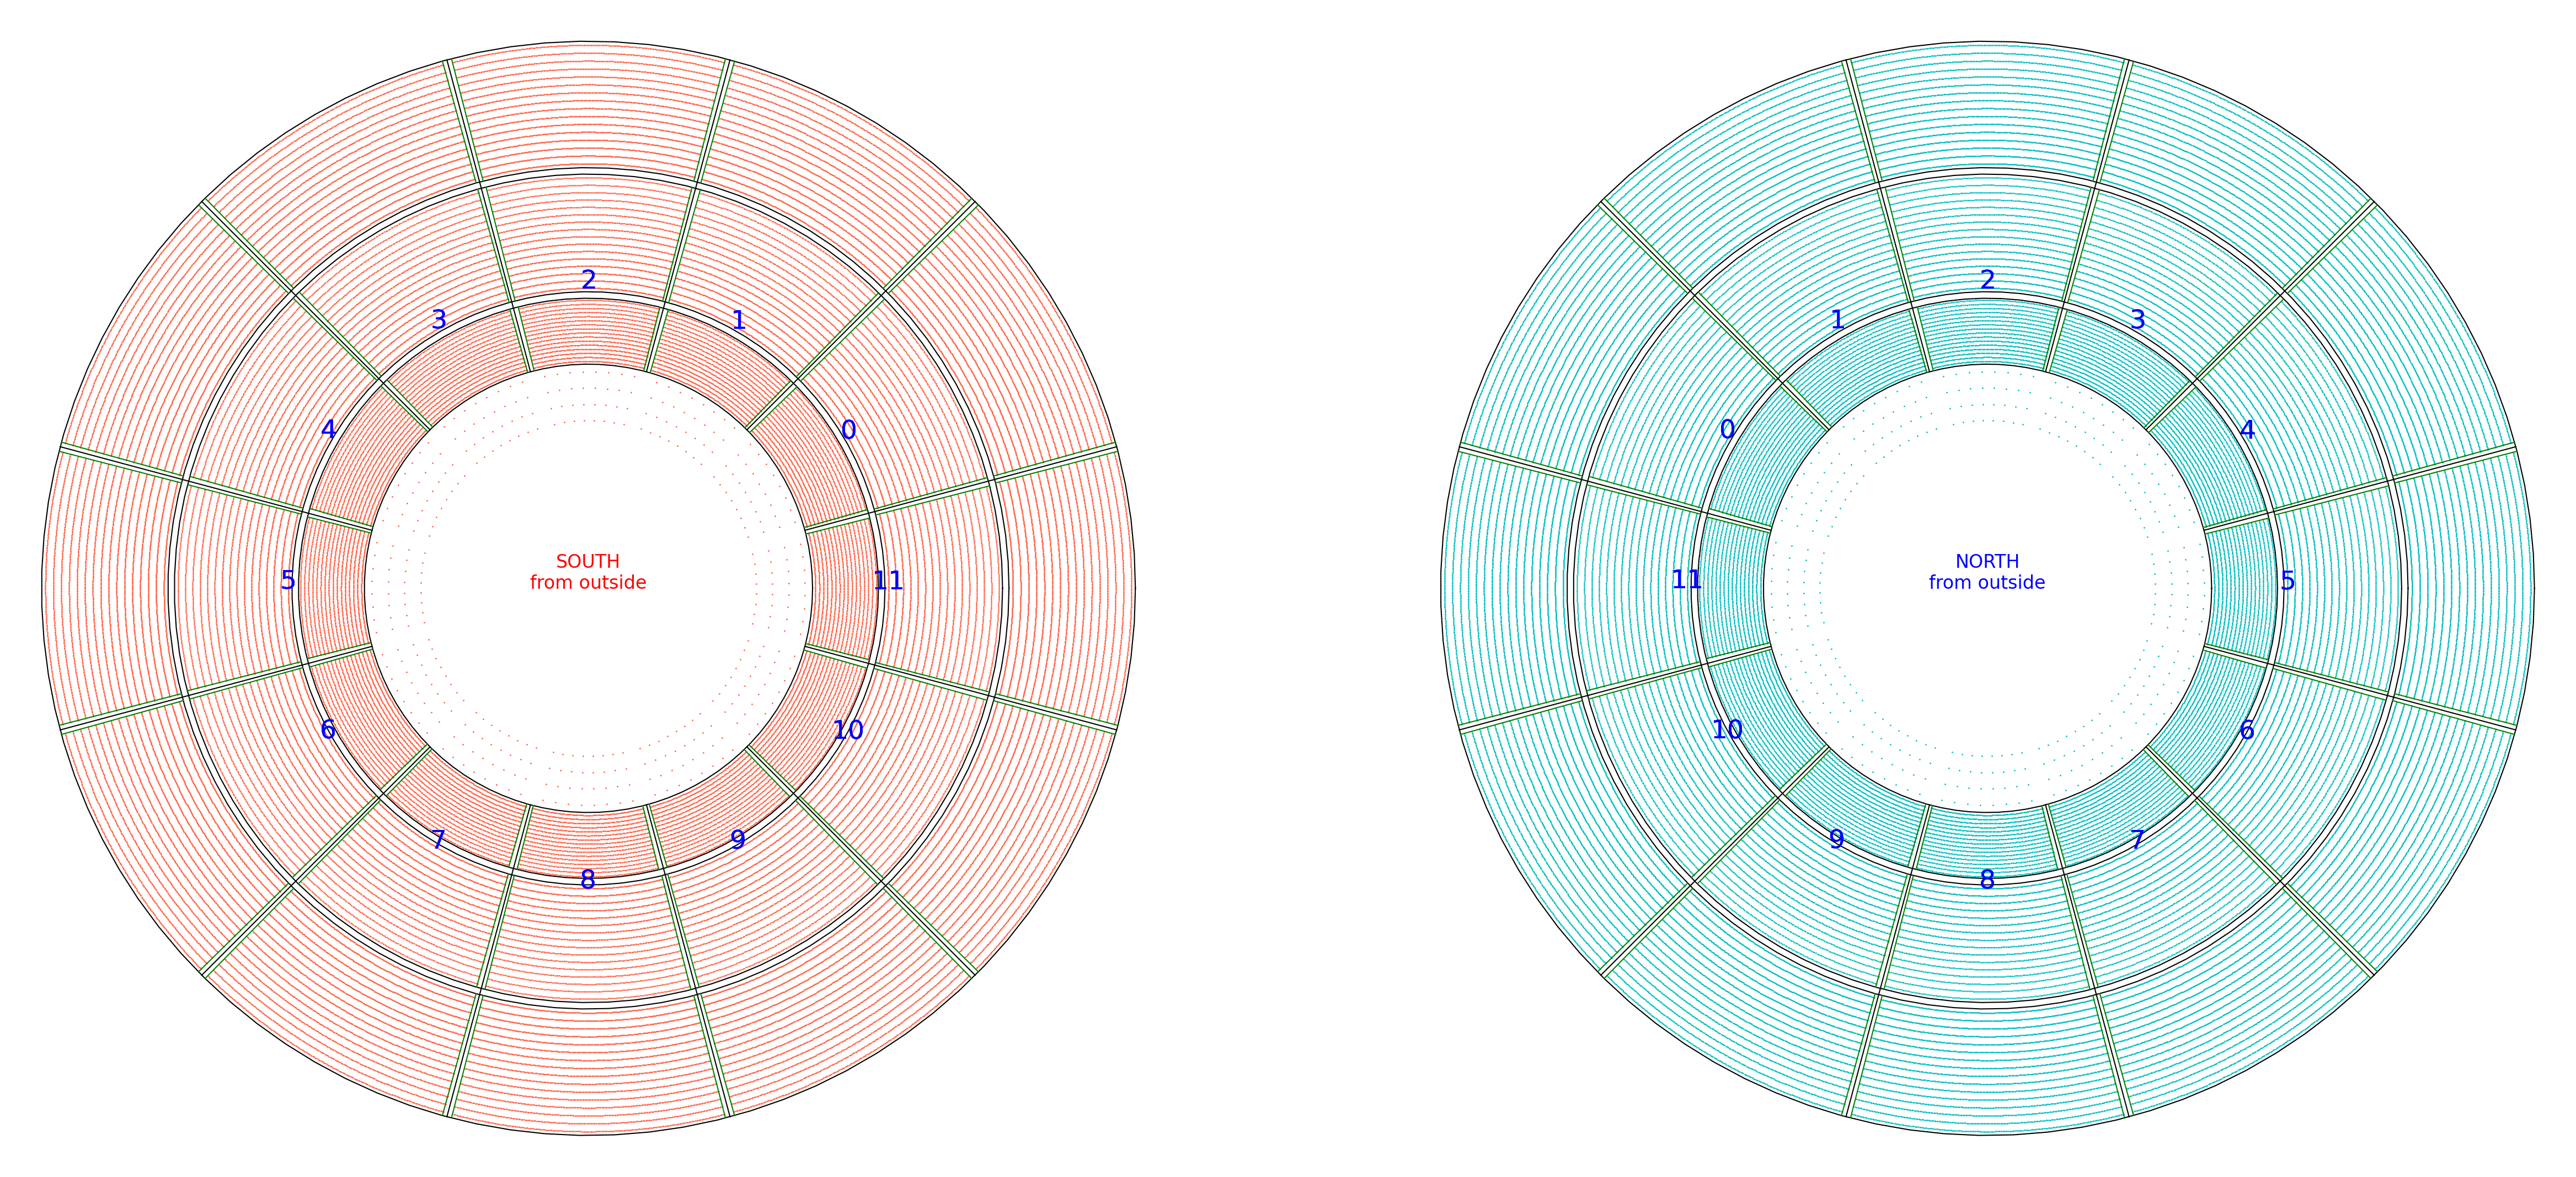

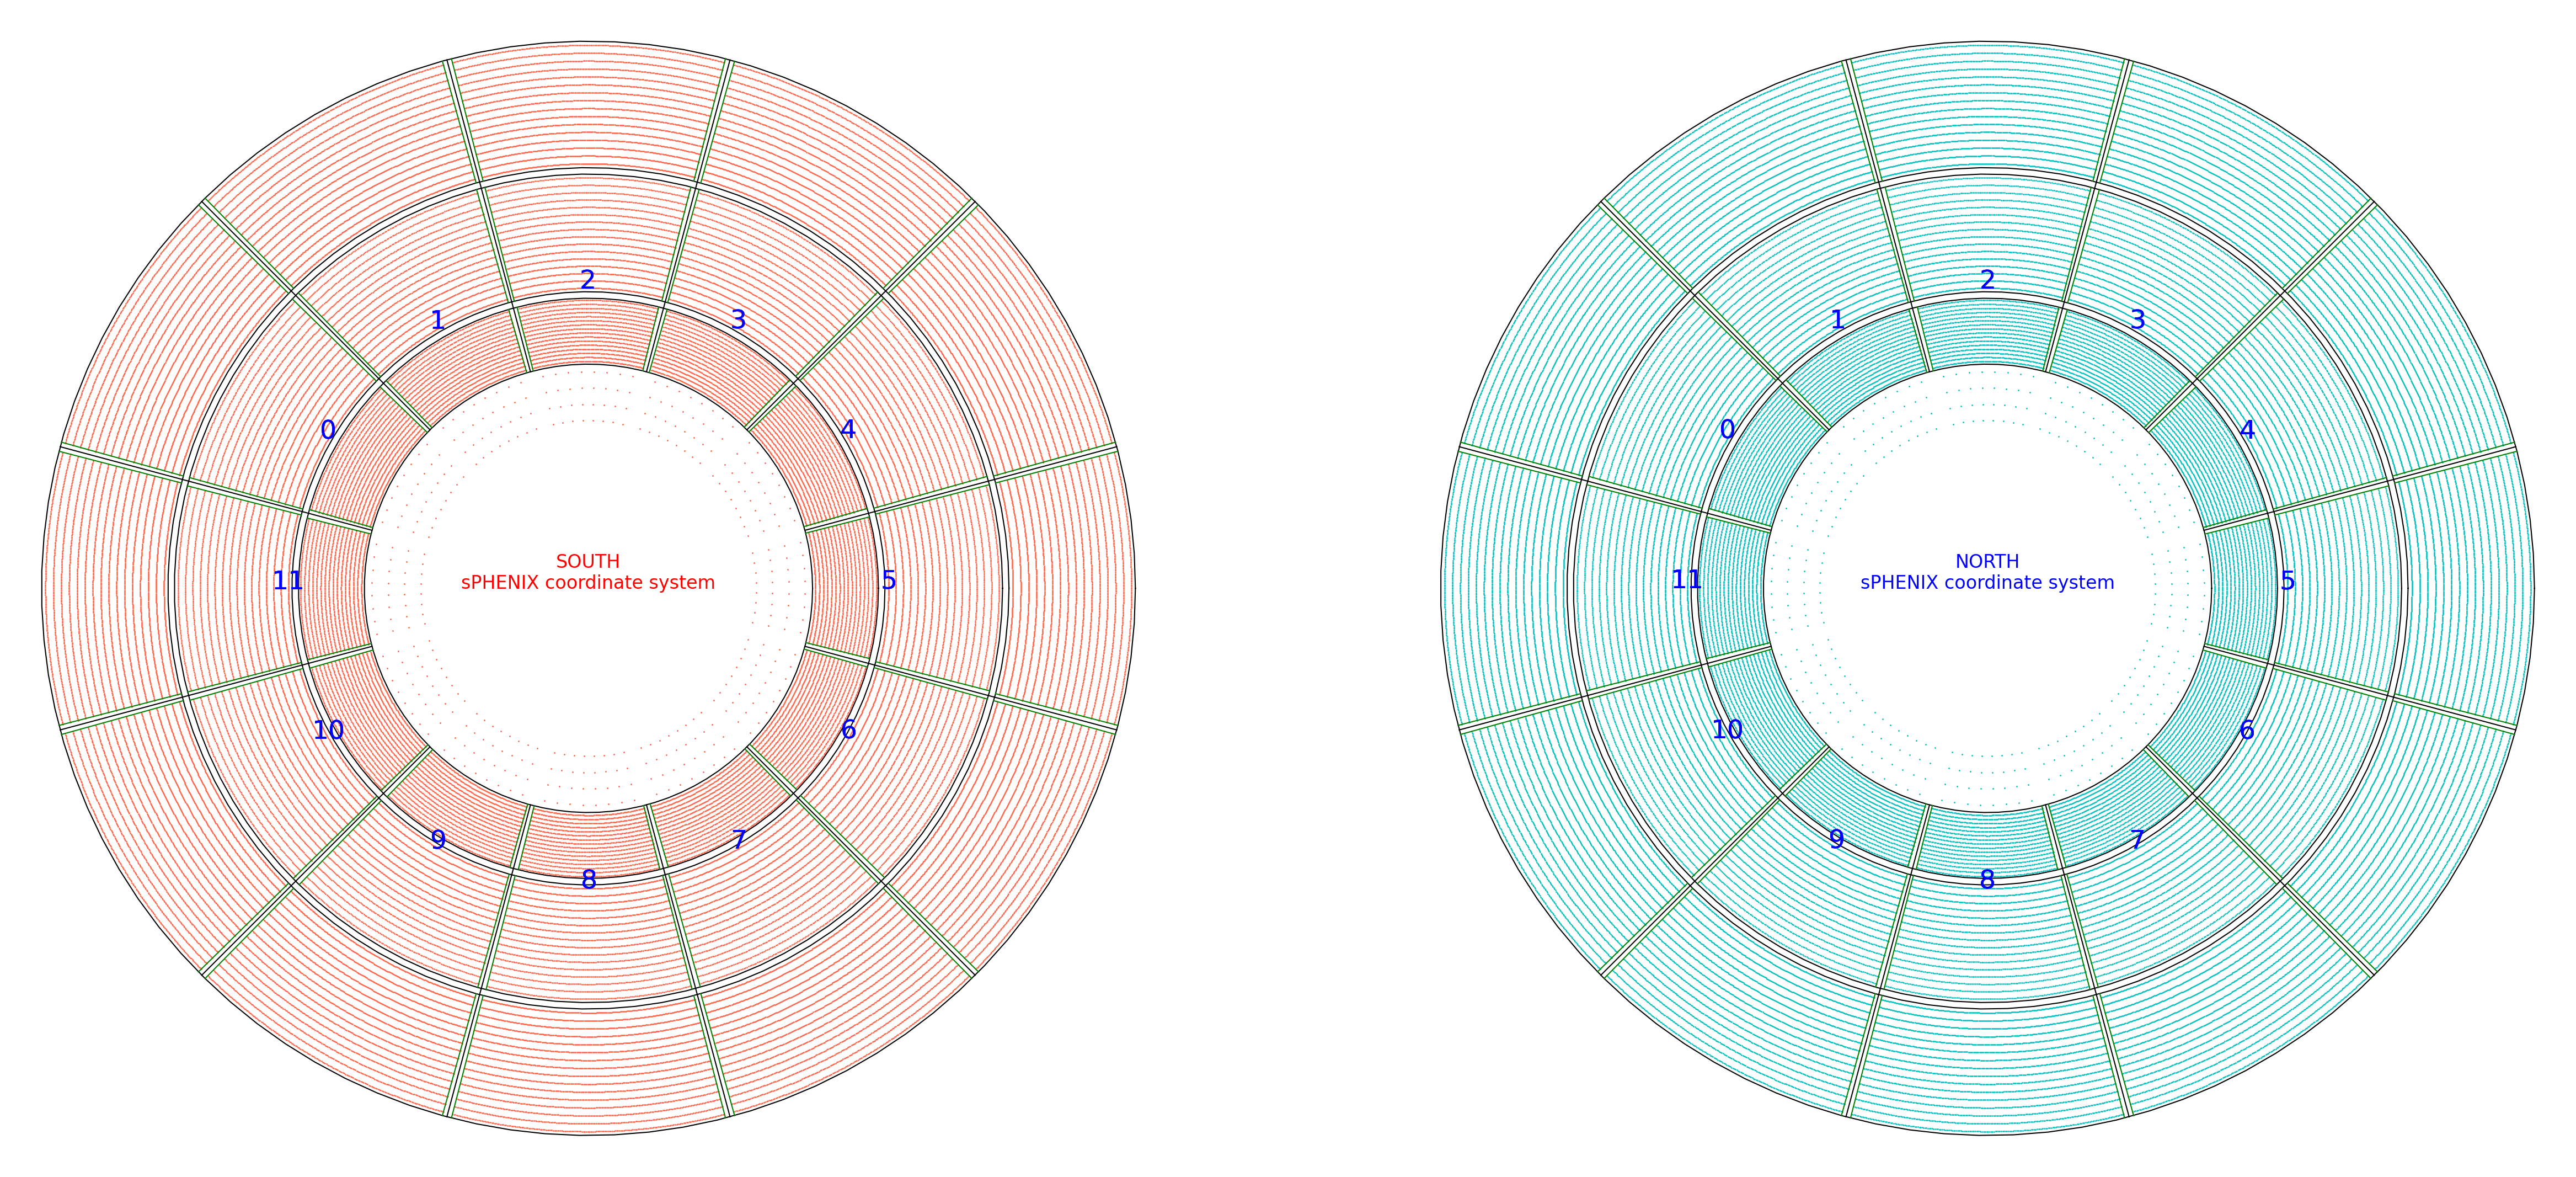

In [ ]:
view={'sPHENIX coordinate system', 'from outside'} #0 - From outside, 1 - sPHENIX coordinate system (z axis is from NORTH to SOUTH)
for v in view:
        draw_wagonwheel(v)

In [37]:
Z = (new_df_centroids[0]['PadPhi'].to_numpy() - old_df_centroids[0]['PadPhi'].to_numpy() - math.pi/2.)*1.e3*new_df_centroids[0]['PadR']
print(Z[-10:])

1526    -16.631013
1527    -16.730979
1528    -16.730175
1529    -16.455834
1530    -16.561729
1531    -16.201152
1532    -15.787614
1533    -16.666137
1534    -15.942776
1535   -386.887511
Name: PadR, dtype: float64


/tmp/ipykernel_17806/4106862263.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


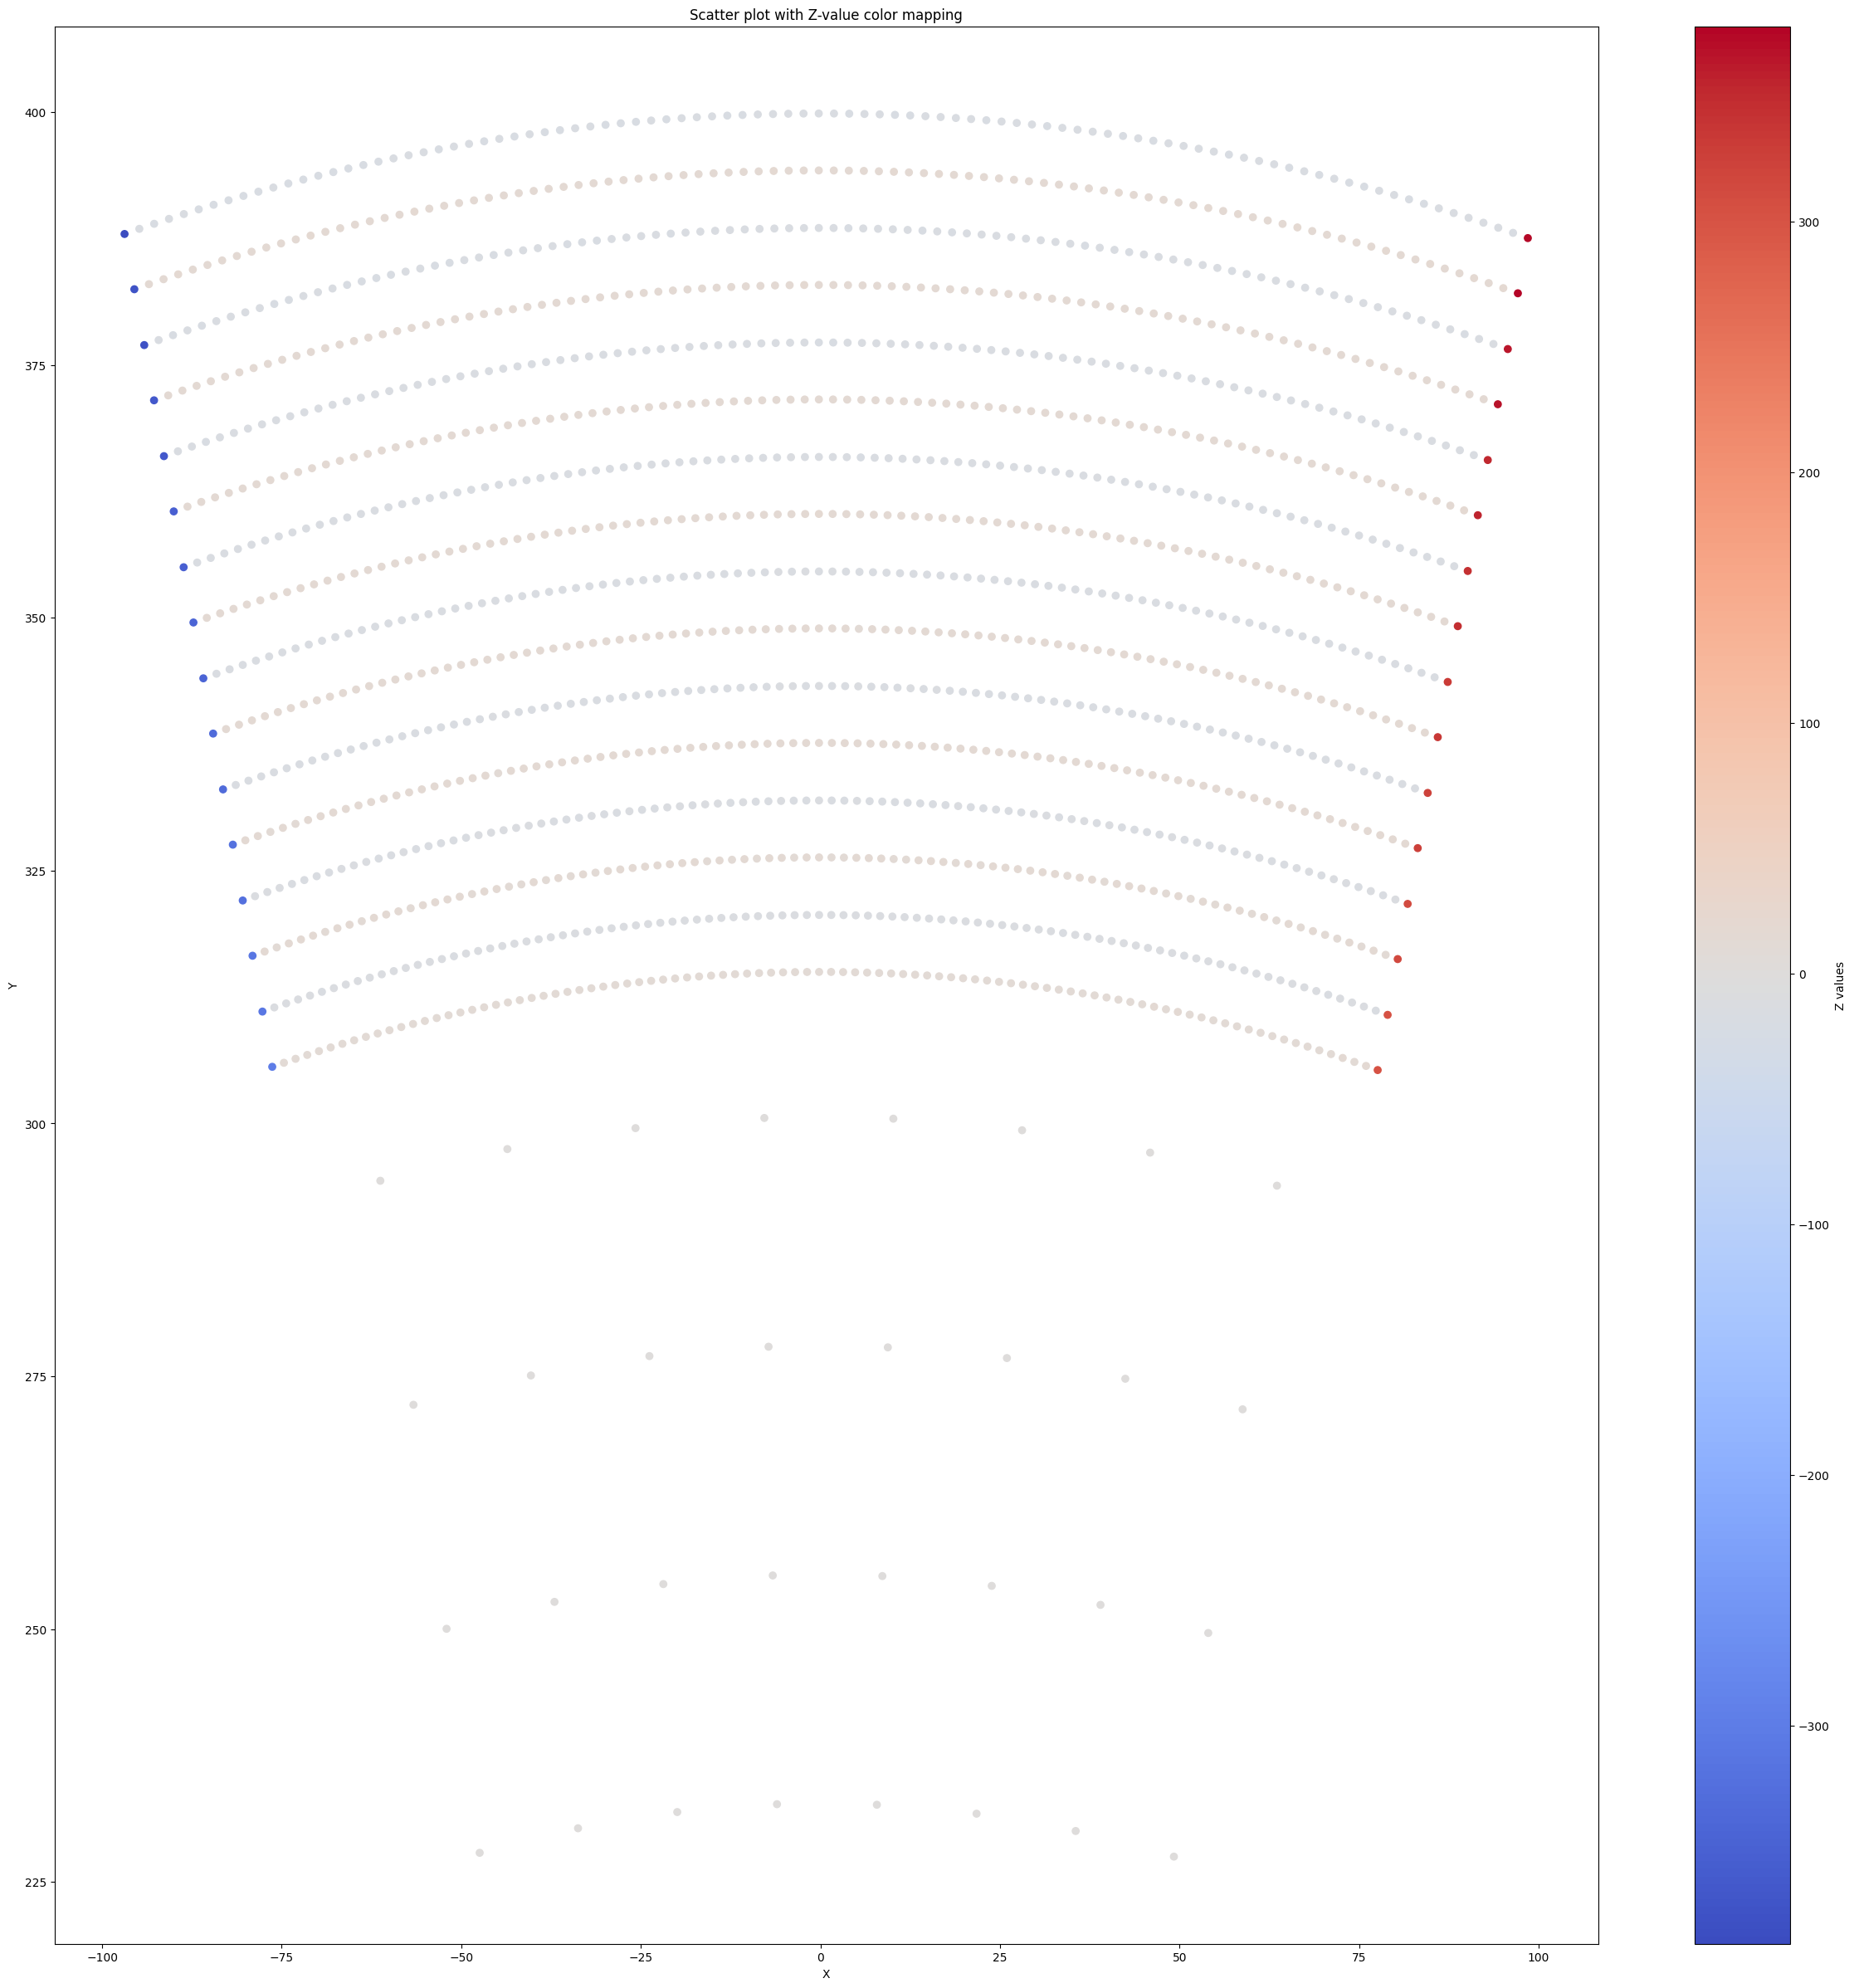

In [36]:
from matplotlib import cm

X = new_df_centroids[0]['PadX'].to_numpy()
Y = new_df_centroids[0]['PadY'].to_numpy()

# Create figure
fig, ax = plt.subplots(figsize=(30, 30))

# Choose colormap
cmap = cm.get_cmap('coolwarm')

# Normalize Z values to colormap range
norm = plt.Normalize(vmin=np.nanmin(Z), vmax=np.nanmax(Z))
norm = plt.Normalize(vmin=np.nanmin(Z), vmax=np.nanmax(Z))
colors = cmap(norm(Z))

# Scatter plot with colors based on Z values
scatter = ax.scatter(X, Y, c=Z, cmap=cmap)

# Add colorbar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Z values')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot with Z-value color mapping')
plt.show()


In [32]:
!jupyter nbconvert --to html ChannelMapping.ipynb --HTMLExporter.theme=dark

[NbConvertApp] Converting notebook ChannelMapping.ipynb to html
[NbConvertApp] Writing 83282471 bytes to ChannelMapping.html
